In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
from numpy import NaN
import sklearn
from IPython.display import clear_output

In [93]:
df=pd.read_csv('bank.csv',sep=';')
clear_output()

In [36]:
df.isna().mean()*100

age                0.000000
job                0.000000
marital            0.000000
education          0.000000
default            0.000000
housing            0.000000
loan               0.000000
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate      41.737885
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed       81.152277
y                  0.000000
dtype: float64

In [37]:
df=df.replace("unknown",NaN)
df.isna().mean()*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate      41.737885
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed       81.152277
y                  0.000000
dtype: float64

In [38]:
# zmieniam kolumny z yes/no na binarne i typ na int
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

pd.to_numeric(df['housing'])
pd.to_numeric(df['default'])
pd.to_numeric(df['loan'])
pd.to_numeric(df['y'])

print(df['housing'].unique())
print(df['default'].unique())
print(df['loan'].unique())
print(df['y'].unique())
df.dtypes

[ 0.  1. nan]
[ 0. nan  1.]
[ 0.  1. nan]
[0 1]


age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate       object
cons.price.idx    float64
cons.conf.idx     float64
euribor3m          object
nr.employed       float64
y                   int64
dtype: object

In [12]:
profile=pp.ProfileReport(df,title='report')
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\magda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
C:\Users\magda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
C:\Users\magda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr i

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**notes**
1. duration==0 - those are cases when customer didn't pick up the phone (86% of records)\\
2. Change values ==999 in column "pdays" (those are customers who haven't been previously contacted ) 
3. nr employed have only one value=5191 or NaN
4. default column is only Nan (20%) or ==no

In [39]:
#ad. note 3- deleting "nr.employed" column
df['nr.employed'].unique()

array([5191.,   nan])

In [40]:
print(len(df.columns))
df=df.drop(columns='nr.employed')
print(len(df.columns))

21
20


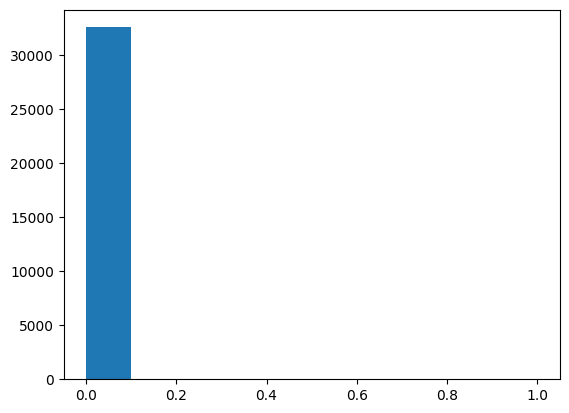

In [41]:
#ad note 4
plt.hist(df['default'])
plt.show()

In [15]:
print(len(df.columns))
df=df.drop(columns='default')
print(len(df.columns))

21
20


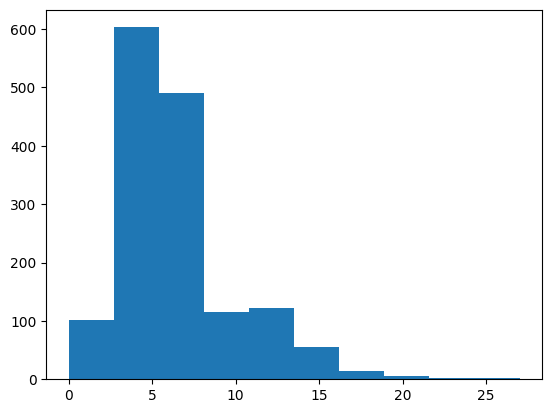

In [42]:
#ad note 2
df=df.replace(999,NaN)
plt.hist(df['pdays'])
plt.show()

In [43]:
#ad note 1
df.groupby("y").aggregate({"duration": "mean"})

,duration
y,
0,220.823515
1,553.095064


There is strong corelation between "y" and "duration" column caused of 86% records=0 (if duration=0 then y=0)

In [44]:
print(len(df.columns))
df=df.drop(columns='duration')
print(len(df.columns))

20
19


In [45]:
df.select_dtypes(exclude=['object']).describe()

,age,default,housing,loan,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y
count,41188.00000,32591.000000,40198.000000,40198.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000092,0.536743,0.155431,2.567593,6.014521,0.172963,93.575664,-40.502600,0.112654
std,10.42125,0.009594,0.498654,0.362319,2.770014,3.824906,0.494901,0.578840,4.628198,0.316173
min,17.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,93.075000,-42.700000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,2.000000,6.000000,0.000000,93.749000,-41.800000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,3.000000,7.000000,0.000000,93.994000,-36.400000,0.000000
max,98.00000,1.000000,1.000000,1.000000,56.000000,27.000000,7.000000,94.767000,-26.900000,1.000000


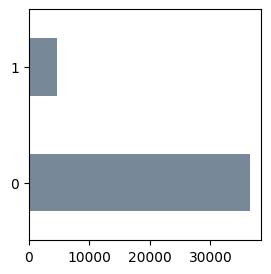

In [46]:
plt.figure(figsize=(3,3))
#df['y'].value_counts().plot(ax=ax,kind = 'bar',autopct = '%.2f')
df['y'].value_counts().plot(kind='barh',color='lightslategray')

plt.show()

bardzo duża dysproporcja między wartościamy 0 i 1 w zmiennej objaśnianej

In [47]:
df.groupby("education").aggregate({'loan':'count'})

,loan
education,
basic.4y,4059
basic.6y,2232
basic.9y,5894
high.school,9295
illiterate,18
professional.course,5118
university.degree,11891


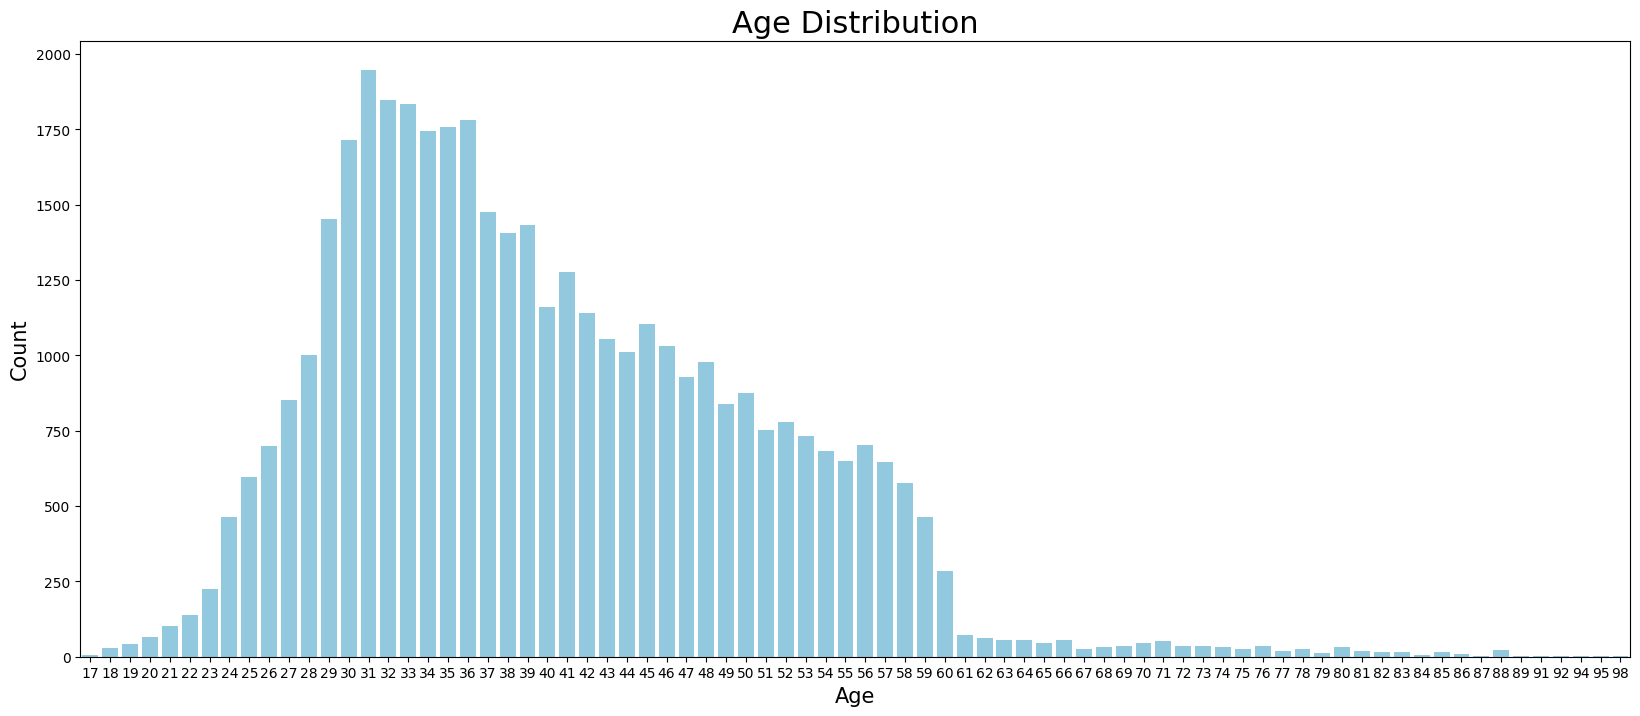

In [48]:
plt.figure(figsize=(20, 8))
sns.countplot(x = 'age', data = df,color='skyblue')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Distribution', fontsize=22)
plt.show()

wśród banadnych są osoby od 17 do 98 r.ż, najwięcej badanych jest w przedziale 30-40 lat

In [ ]:
%matplotlib inline


In [49]:
print(df['emp.var.rate'].unique())
df.groupby("emp.var.rate").aggregate({"y": "count"})

['01.01.2022' '01.04.2022' nan]


,y
emp.var.rate,
01.01.2022,7763
01.04.2022,16234


tez chyba jakas bez sensu kolumna(??)

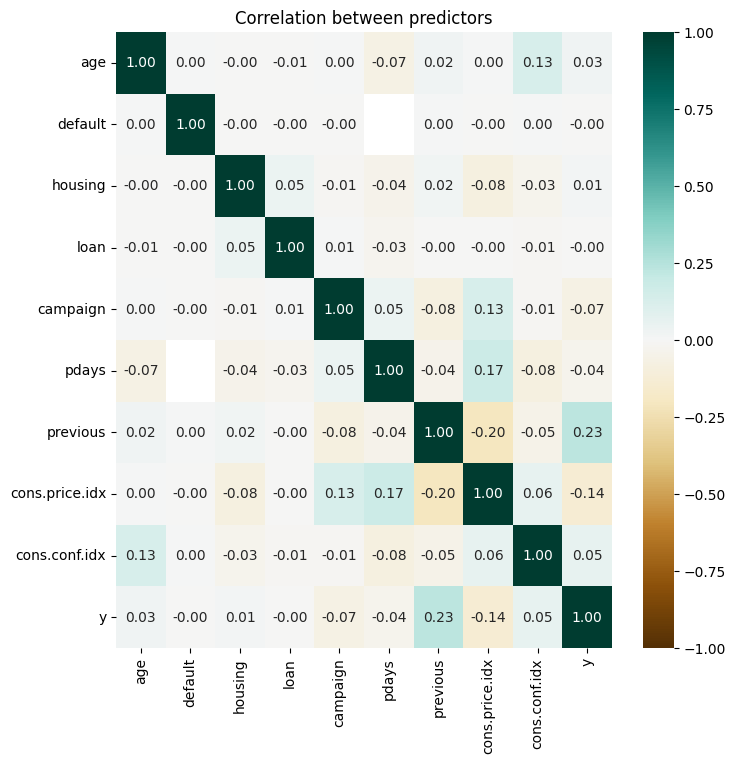

In [55]:
plt.figure(figsize=(8,8))
corr_matrix = df.corr(numeric_only=True)
heatmap = sns.heatmap(corr_matrix,vmin=-1, vmax=1, cmap="BrBG",annot=True,fmt='.2f')
heatmap.set(title="Correlation between predictors")
sns.light_palette('seagreen', as_cmap=True)

plt.show()

In [120]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'y'],
      dtype='object')

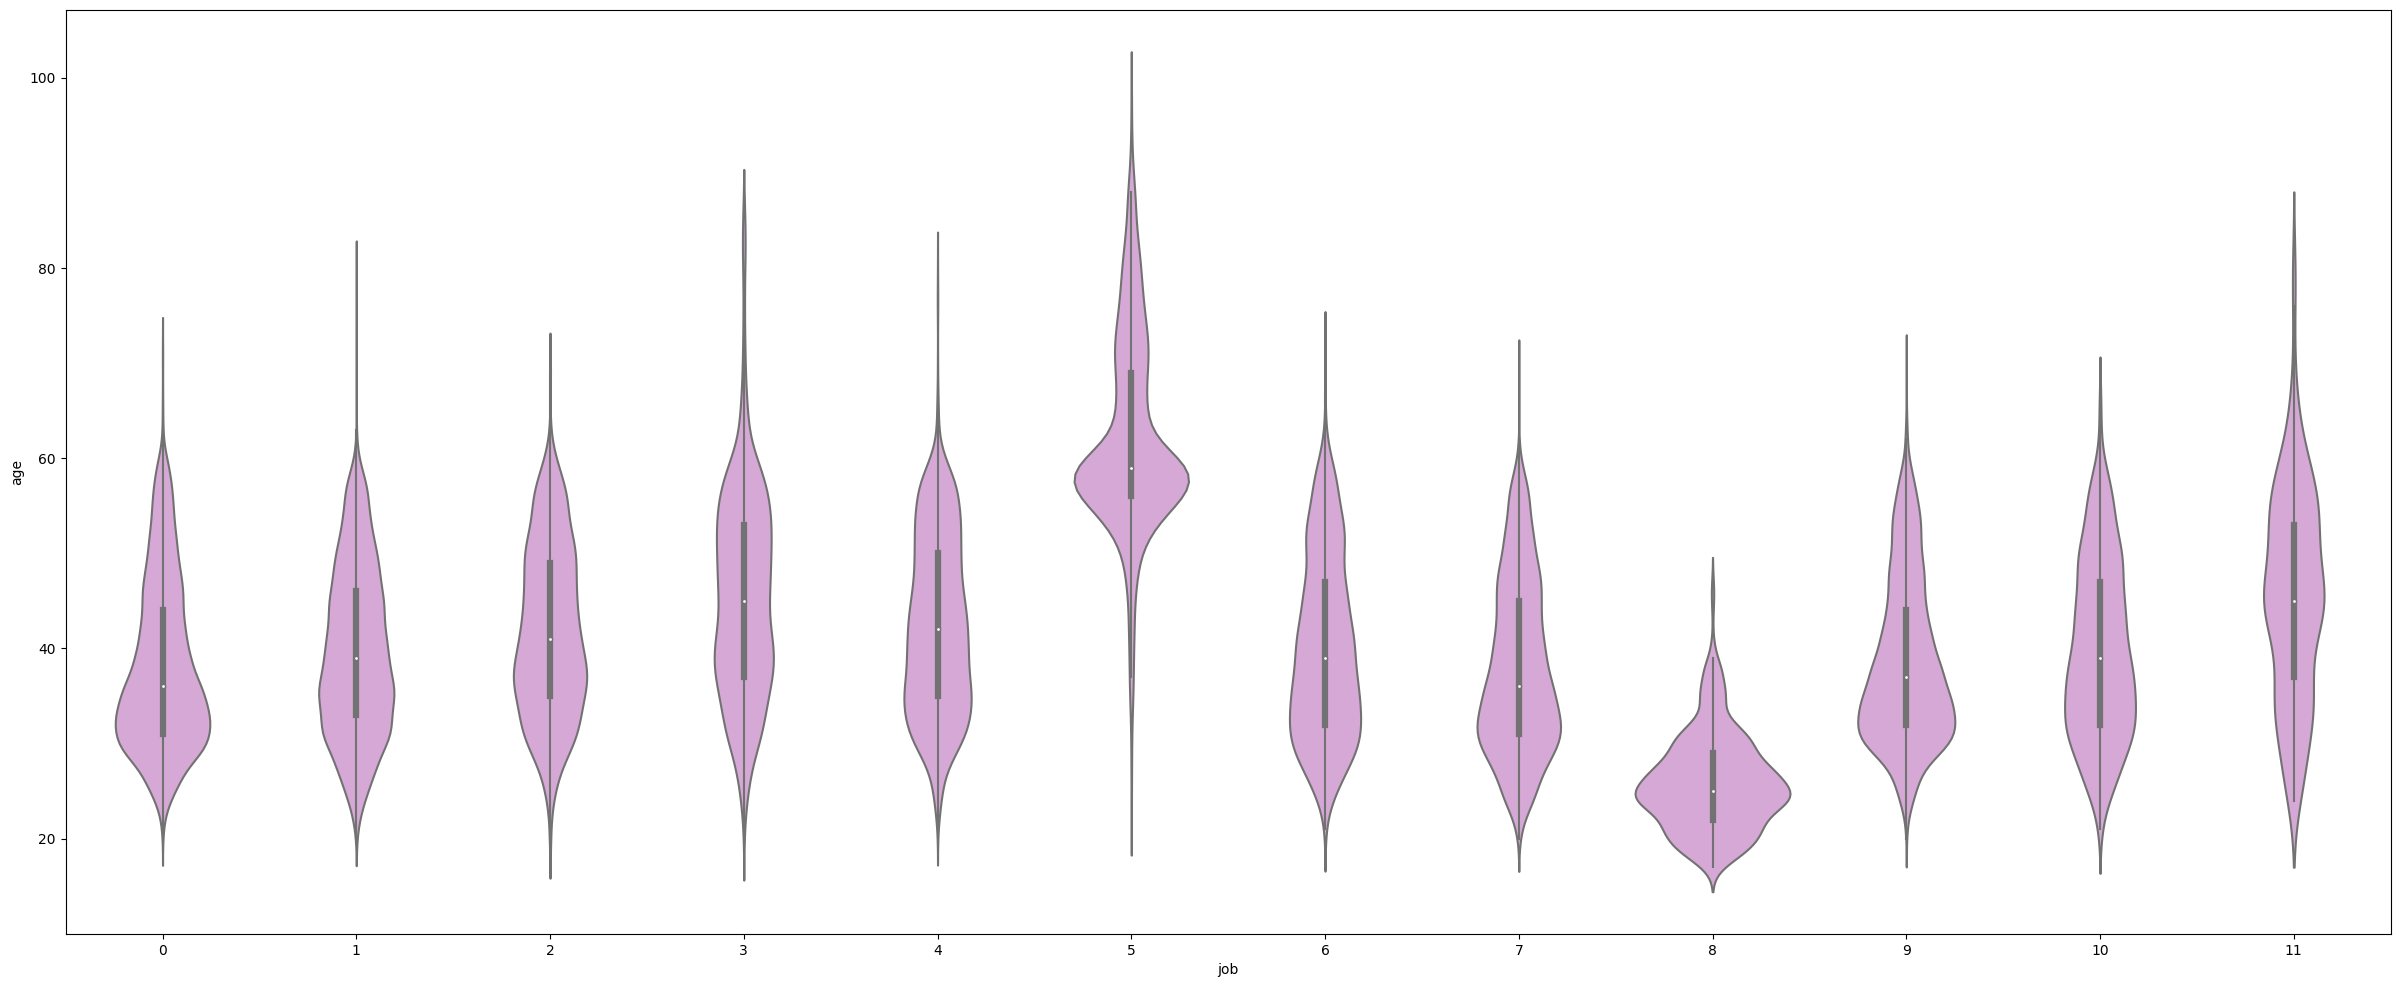

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.violinplot(data=df, x="job", y="age",color="plum")
plt.show()

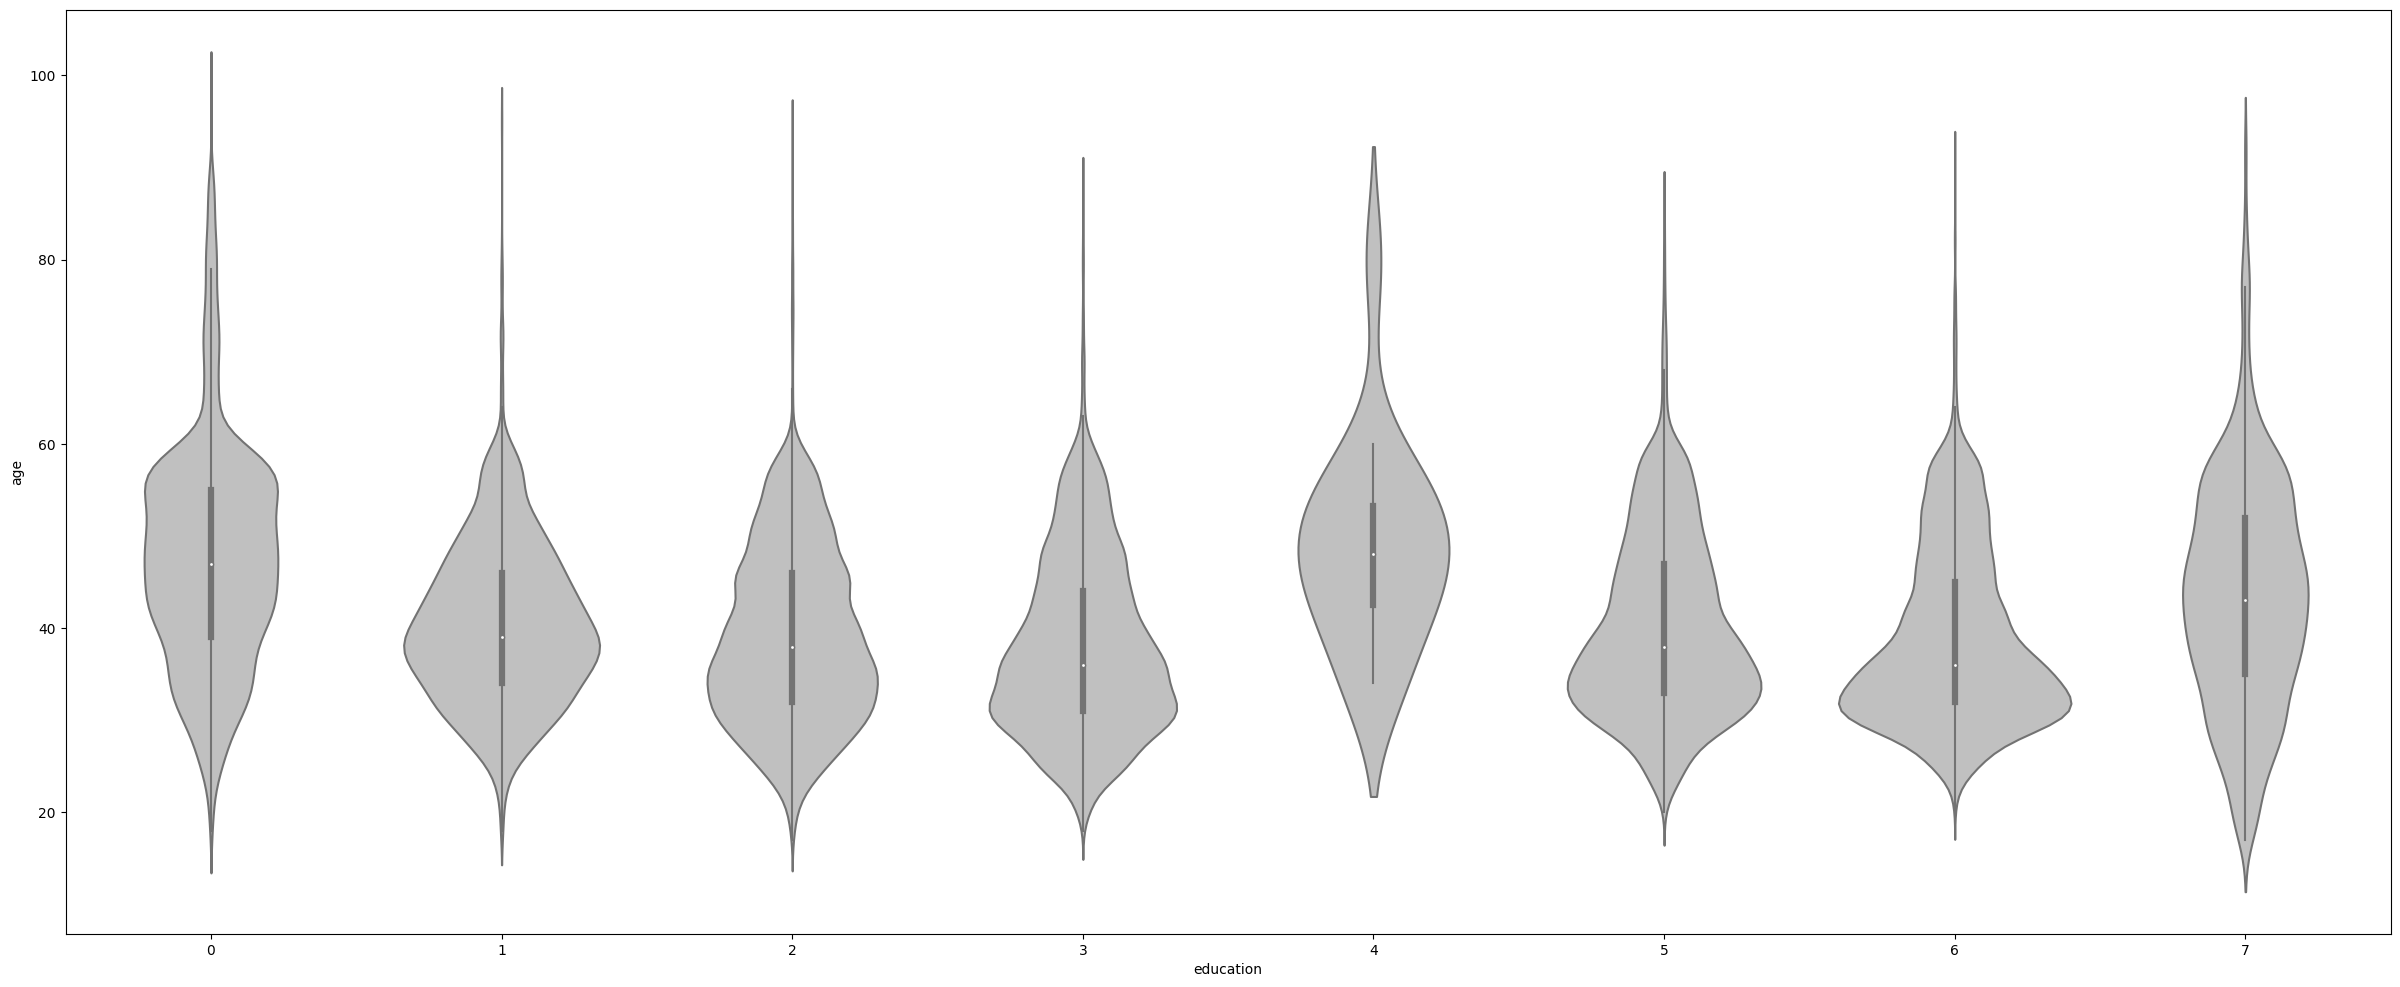

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.violinplot(data=df, x="education", y="age",color='silver')
plt.show()

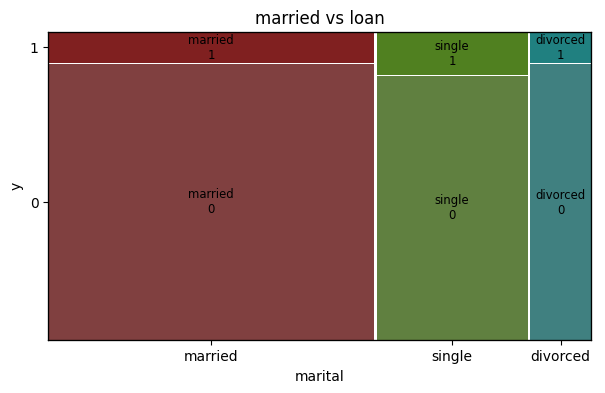

In [56]:
from statsmodels.graphics.mosaicplot import mosaic


#df_to_plot = df[[ "marital","y"]]
fig, ax = plt.subplots()
fig.set_size_inches(7 , 4)
ax.set_xlabel('marital')
ax.set_ylabel("y")
mosaic(data=df, index=["marital", "y"], title="married vs loan", ax=ax )
plt.show()

In [187]:
marital

['divorced', 'married', 'single', 'unknown']

Because of big disproportion in y its not so good visible but single people are taking loans more often that married or divorced ones

In [ ]:
#2 etap
df.head(5)

In [94]:
#zamieniam zmienne kategoryczne OrdinalEncoderem i zapisuje jakie były kategorie, zeby nie stracic tej informacji
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()
df['job']=le.fit_transform(df[['job']])
job=le.categories_
df['education']=le.fit_transform(df[['education']])
education=le.categories_
df['marital']=le.fit_transform(df[['marital']])
marital=le.categories_
df['contact']=le.fit_transform(df[['contact']])
contact=le.categories_
df['poutcome']=le.fit_transform(df[['poutcome']])
poutcome=le.categories_
job

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object)]

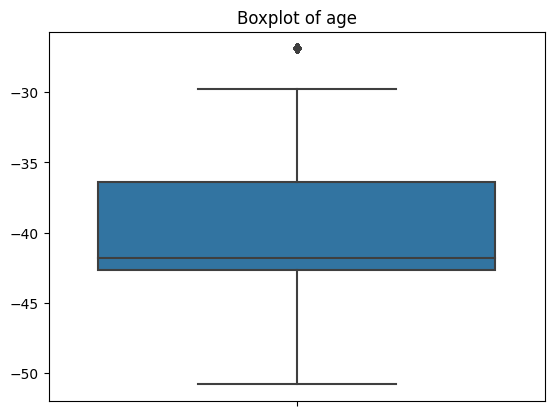

In [6]:
boxplot = sns.boxplot(df["cons.conf.idx"])
boxplot.set(xticklabels=[])
boxplot.set(title="Boxplot of age")
plt.show()

In [7]:
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [ ]:
plt.hist(df['cons.conf.idx'])
plt.show()

#na boxplocie widać, że są wartości odstające w kolumnie cons.conf.idx, ale po analizie wartości i histogramu zdecydowałam się ich nie ucinać bo to jest jakis miesięczny wskaźnik klienta banku, wartosci nie wyglądają na jakieś blędnie wpisane, a mogą wskazywać na konkretny "typ" klienta

In [ ]:
#bank ma 3 różne wskaźniki - 
#1.cons.price.idx - o wartościach od około 92 do 95
#2. cons.coef.idx o wartościach od około -50 do -25
#3. euribor3m o wartościach od około 4 do 6

#mysle ze dobrym pomysłem będzie normalizacja, tak, zeby pochodzily z rozkladu normalnego o EX=0 i odchyleniu=1


In [57]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,NaN,0,nonexistent,01.01.2022,93.994,-36.4,4.857,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,NaN,0,nonexistent,01.01.2022,93.994,-36.4,4.857,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,NaN,0,nonexistent,01.01.2022,93.994,-36.4,4.857,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,NaN,0,nonexistent,01.01.2022,93.994,-36.4,4.857,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,NaN,0,nonexistent,01.01.2022,93.994,-36.4,4.857,0


In [80]:
df['euribor3m']=pd.to_numeric(df['euribor3m'],errors='coerce')
df['euribor3m'].isna().mean()*100
euri_std=np.std(df['euribor3m'])
euri_mean= np.mean(df['euribor3m'])
df['euribor3m']=(df['euribor3m']-euri_mean)/euri_std

df['cons.price.idx']=pd.to_numeric(df['cons.price.idx'],errors='coerce')
df['cons.price.idx'].isna().mean()*100
price_std=np.std(df['cons.price.idx'])
price_mean= np.mean(df['cons.price.idx'])
df['cons.price.idx']=(df['cons.price.idx']-price_mean)/price_std

df['cons.coef.idx']=pd.to_numeric(df['cons.coef.idx'],errors='coerce')
df['cons.coef.idx'].isna().mean()*100
coef_std=np.std(df['cons.coef.idx'])
coef_mean= np.mean(df['cons.coef.idx'])
df['cons.coef.idx']=(df['cons.coef.idx']-coef_mean)/coef_std